<a href="https://colab.research.google.com/github/sanjanavegge/AND-internship/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pltpx

explore data

In [ ]:
data= pd.read_csv('/content/archive (3).zip')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
corr = data.select_dtypes(include='number').corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

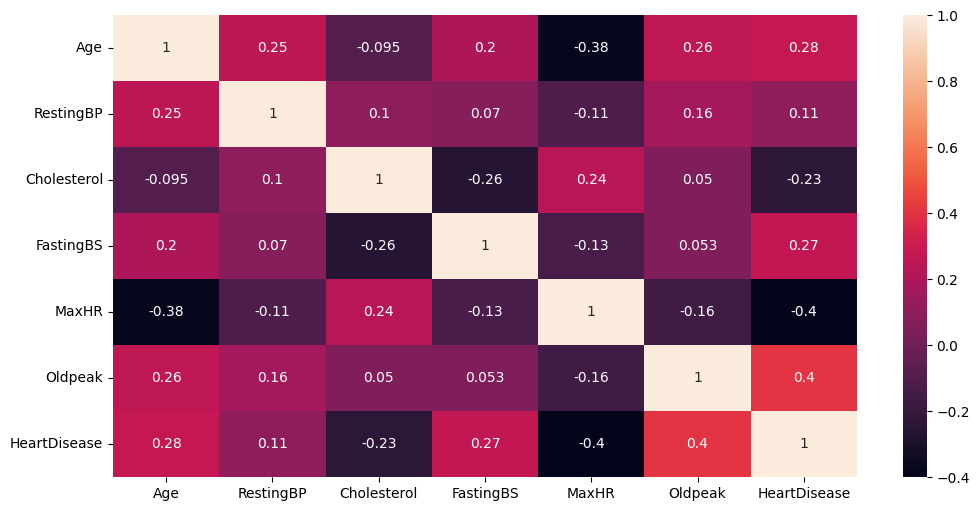

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [ ]:
#data visualization
pltpx.pie(data,values='HeartDisease',names='Sex',title='Gender differences in HeartFailure')

In [ ]:
pltpx.pie(data,values='HeartDisease',names='ChestPainType')


In [ ]:

pltpx.scatter(data,x='Age',y='RestingBP',color='Sex',color_discrete_map={'F':'orange','M':'red'},title="Age Vs. RestingBP")


In [ ]:

pltpx.scatter(data,x='Age',y='MaxHR',color='Sex',color_discrete_map={'F':'orange','M':'red'},title="Age Vs. MaxHR")

In [ ]:
pltpx.histogram(data,x='ChestPainType',color='Sex',title='Major types of Chest Pains')

In [ ]:
pltpx.histogram(data,x='RestingECG',color='Sex')

In [ ]:
pltpx.histogram(data,x='ST_Slope',color='Sex',title='Count Of ST_Slope')

In [ ]:
pltpx.histogram(data,x='Sex',color='HeartDisease',barmode='group',title='Distribution Of Sick And The Healthy')

categorical data

In [ ]:
for col in data.columns:
    if data[col].dtype=='object':
        print(col)
        print(data[col].unique())

Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingECG
['Normal' 'ST' 'LVH']
ExerciseAngina
['N' 'Y']
ST_Slope
['Up' 'Flat' 'Down']


In [ ]:
chest_pain_type_dummies = pd.get_dummies(data['ChestPainType'], prefix='ChestPainType')
data = pd.concat([data, chest_pain_type_dummies], axis=1)
data.drop('ChestPainType', axis=1, inplace=True)

In [ ]:
resting_ecg_type_dummies = pd.get_dummies(data['RestingECG'], prefix='RestingECG')
data = pd.concat([data, resting_ecg_type_dummies], axis=1)
data.drop('RestingECG', axis=1, inplace=True)

In [ ]:
st_slope_type_dummies = pd.get_dummies(data['ST_Slope'], prefix='ST_Slope')
data = pd.concat([data, st_slope_type_dummies], axis=1)
data.drop('ST_Slope', axis=1, inplace=True)

In [ ]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,N,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,F,160,180,0,156,N,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,M,130,283,0,98,N,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,F,138,214,0,108,Y,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,M,150,195,0,122,N,0.0,0,False,False,True,False,False,True,False,False,False,True


In [ ]:
data.dtypes

Age                    int64
Sex                   object
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina        object
Oldpeak              float64
HeartDisease           int64
ChestPainType_ASY       bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_LVH          bool
RestingECG_Normal       bool
RestingECG_ST           bool
ST_Slope_Down           bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object' or data[col].dtype=='bool' :
        data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
data.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ASY      int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_LVH         int64
RestingECG_Normal      int64
RestingECG_ST          int64
ST_Slope_Down          int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

<Axes: >

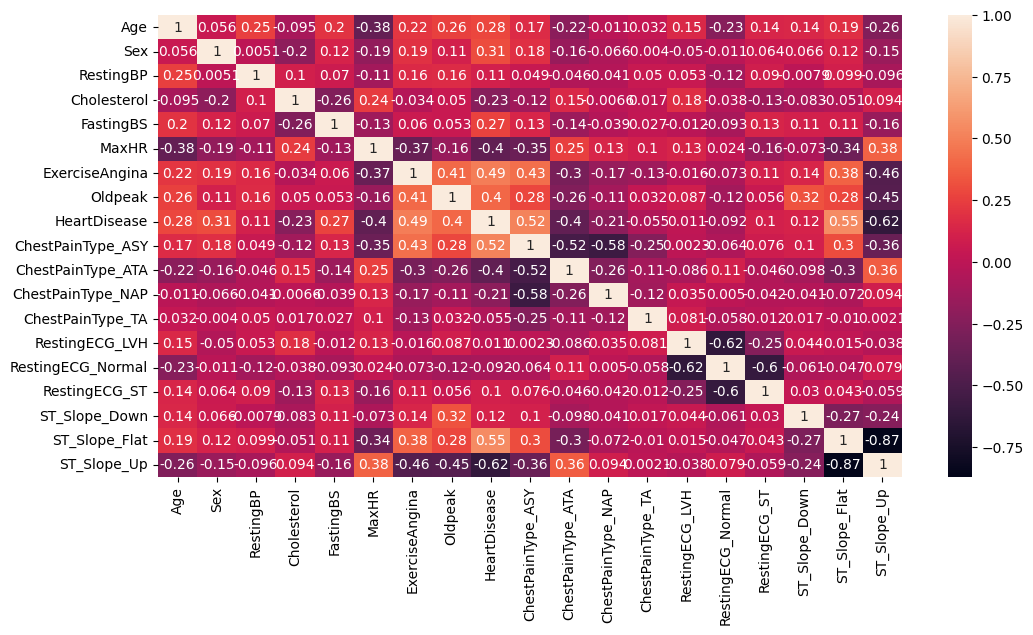

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

model building

In [ ]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
X.shape,y.shape

((918, 18), (918,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression(C=0.1)
LR_Model.fit(x_train,y_train)
print("LR training score :",LR_Model.score(x_train,y_train))
print("LR testing score :",LR_Model.score(x_test,y_test))

LR training score : 0.8520249221183801
LR testing score : 0.8659420289855072


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=8)

RF.fit(x_train,y_train)

print("RF training score :",RF.score(x_train,y_train))
print("RF testing score :",RF.score(x_test,y_test))

RF training score : 0.9003115264797508
RF testing score : 0.8659420289855072


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=4,criterion='entropy')

DT.fit(x_train,y_train)

print("DT training score :",DT.score(x_train,y_train))
print("DT testing score :",DT.score(x_test,y_test))

DT training score : 0.8644859813084113
DT testing score : 0.8405797101449275


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier( learning_rate=0.01,
    max_depth=2,
    max_features=0.5,
    min_samples_leaf=5,
    min_samples_split=5,
    n_estimators=1000,
    subsample=0.8,
    random_state=42)

GBC.fit(x_train,y_train)

print("GBC training score :",GBC.score(x_train,y_train))
print("GBC testing score :",GBC.score(x_test,y_test))

GBC training score : 0.9096573208722741
GBC testing score : 0.8913043478260869
